# O Scikit-Learn
- Ferramentas simples e eficientes para análise preditiva de dados
- Acessível a todos e reutilizável em vários contextos
- Construído em NumPy, SciPy e Matplotlib
- Disponível em: https://scikit-learn.org/

### Utilizando o Scikit-Learn nos dados vistos no módulo "Utilizando o Aprendizado de Máquinas"
- Vamos usar o dataset iris, bastante conhecido pra quem já trabalha com Machine Learning
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando o dataset iris
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
# Transformando em um dataframe e usando somente target 0 e 1
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
iris = iris[iris.target != 2]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Vamos utilizar o Perceptron para separar esses dados
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

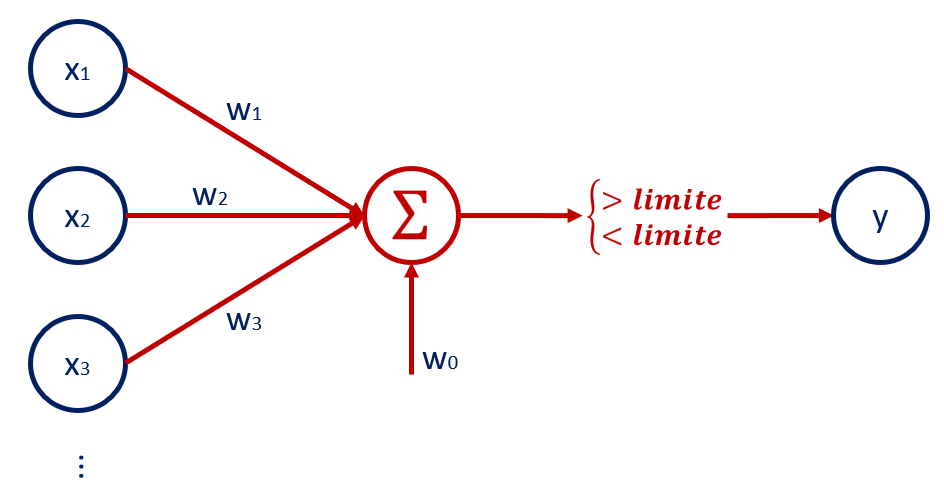

In [4]:
# Importação do perceptron
from sklearn.linear_model import Perceptron

In [5]:
iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [6]:
X = iris[['petal length (cm)','petal width (cm)']]
y = iris.target

In [7]:
clf = Perceptron()

In [8]:
# Fazendo o fit do modelo
clf.fit(X, y)

Perceptron()

In [9]:
# Avaliando o modelo para a base completa 
# (não separamos ainda em treino e teste)
clf.score(X, y)

1.0

**Criando um gráfico com esses dados**

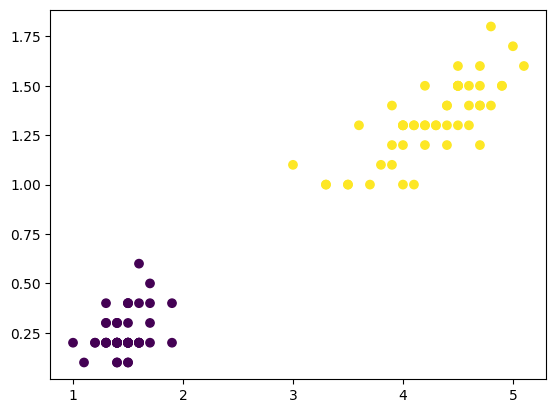

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(iris['petal length (cm)'], iris['petal width (cm)'],c=iris.target)

plt.show()

**Exibindo a reta gerada pelo Perceptron**

In [11]:
# w1 e w2
clf.coef_

array([[0.9, 1.7]])

In [12]:
# w0
clf.intercept_

array([-3.])

**Entendendo a reta gerada pelo perceptron**<br>
w1.x + w2.y + w0 = 0<br>
w2.y = - w1.x - w0<br>
y = (- w1.x - w0)/w2

In [13]:
# Criando a reta
import numpy as np

w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]
w0 = clf.intercept_[0]

x = np.arange(0,5)
y = (-w1*x-w0)/w2

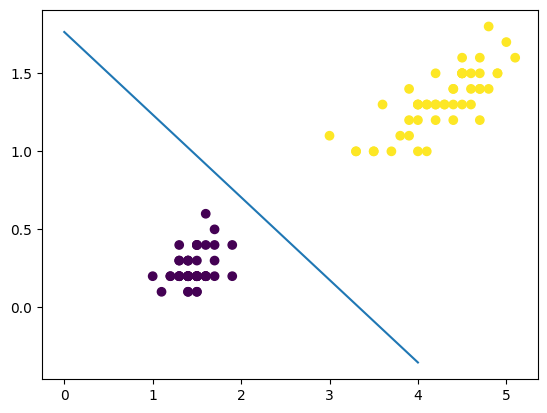

In [14]:
# Visualizando de forma gráfica
fig, ax = plt.subplots()

ax.scatter(iris['petal length (cm)'], iris['petal width (cm)'],c=iris.target)
ax.plot(x,y)

plt.show()

### Agora vamos utilizar a árvore de decisão para tratar esses dados
- https://scikit-learn.org/stable/modules/tree.html

In [15]:
# Importando a árvore de decisão
from sklearn import tree

In [16]:
# Definindo os dados
X = iris[['petal length (cm)','petal width (cm)']]
y = iris.target

In [17]:
# Criando o nosso classificador
clf = tree.DecisionTreeClassifier()

In [18]:
# Fazendo o fit com os dados
clf.fit(X,y)

DecisionTreeClassifier()

In [19]:
# Avaliando o modelo
clf.score(X, y)

1.0

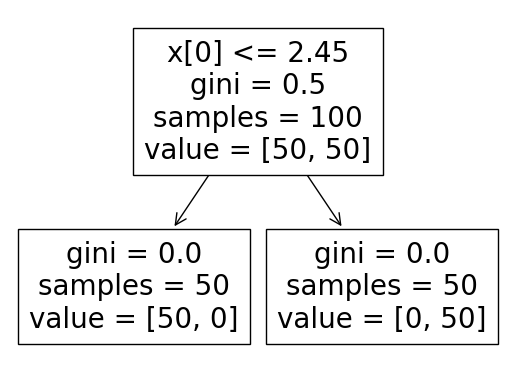

In [20]:
# Visualizando as decisões tomadas por essa árvore
tree.plot_tree(clf);

In [25]:
iris.loc[iris['petal length (cm)']  <= 2.45, 'target'].value_counts()

target
0    50
Name: count, dtype: int64

In [23]:
iris[iris['petal length (cm)']  <= 2.45]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
